In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/muham/OneDrive/Desktop/laptop_price predictor/dataset.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:

df.drop(columns=['Unnamed: 0'],inplace=True) 

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float16')
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   str    
 1   TypeName          1303 non-null   str    
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   str    
 4   Cpu               1303 non-null   str    
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   str    
 7   Gpu               1303 non-null   str    
 8   OpSys             1303 non-null   str    
 9   Weight            1303 non-null   float16
 10  Price             1303 non-null   float64
dtypes: float16(1), float64(2), int32(1), str(7)
memory usage: 99.4 KB


C:\Users\muham\AppData\Local\Temp\ipykernel_7456\2688081179.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'],kde=True)


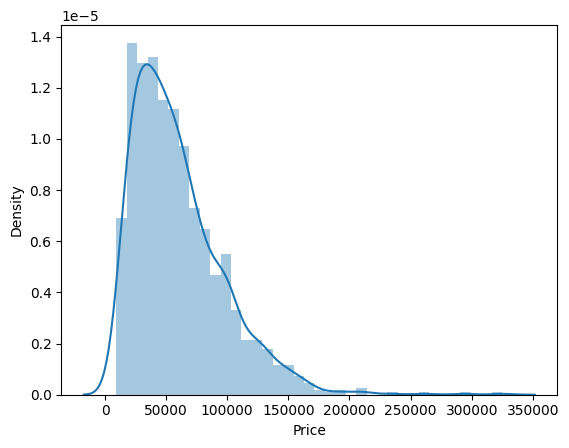

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df['Price'],kde=True)
plt.show()

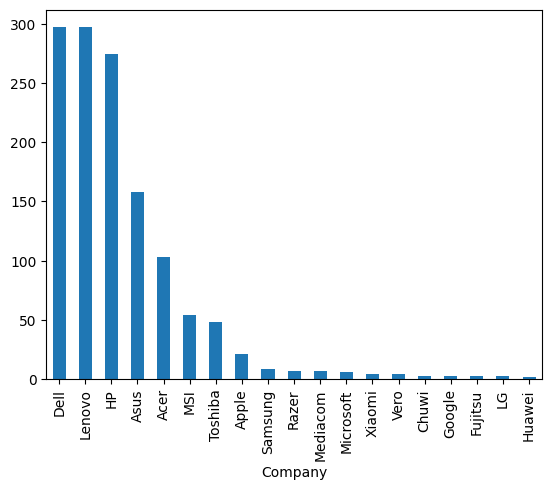

In [5]:
df['Company'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='Company'>

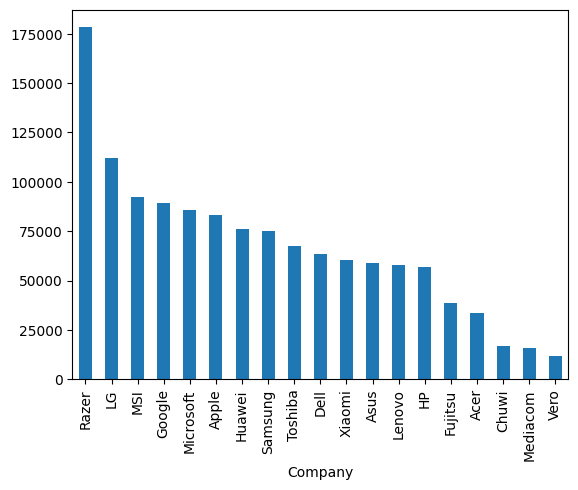

In [6]:
df.groupby(['Company'])['Price'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='TypeName'>

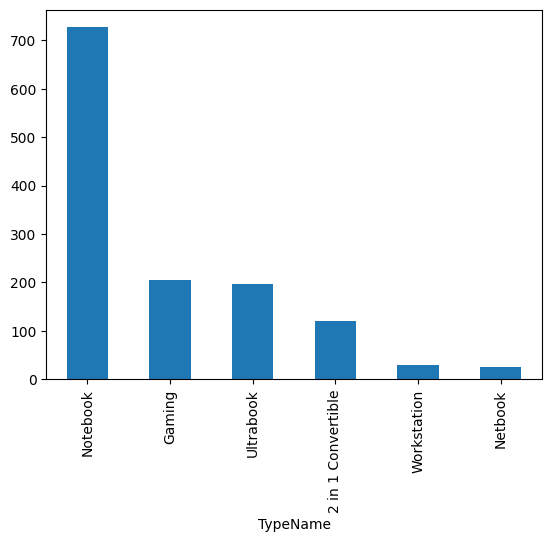

In [7]:
df['TypeName'].value_counts().plot(kind='bar')

In [8]:
df.head(1)

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832


<Axes: xlabel='Inches', ylabel='Price'>

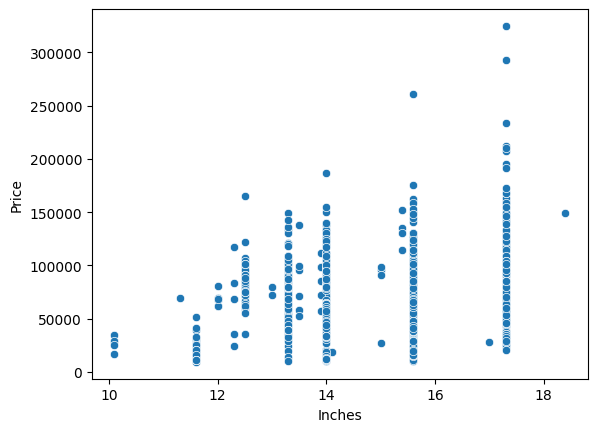

In [9]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [10]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [11]:
df['Touchscreen']  = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [12]:
df.sample(5)

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
59,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,Linux,2.000000,22111.20,0
526,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.199219,42570.72,0
1152,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,1TB HDD,AMD Radeon R5 M330,No OS,2.320312,31914.72,0
918,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.599609,71874.72,0
1042,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,256GB SSD,Nvidia GeForce 930M,Windows 10,2.400391,75924.00,0


In [13]:
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

<Axes: xlabel='Touchscreen', ylabel='Price'>

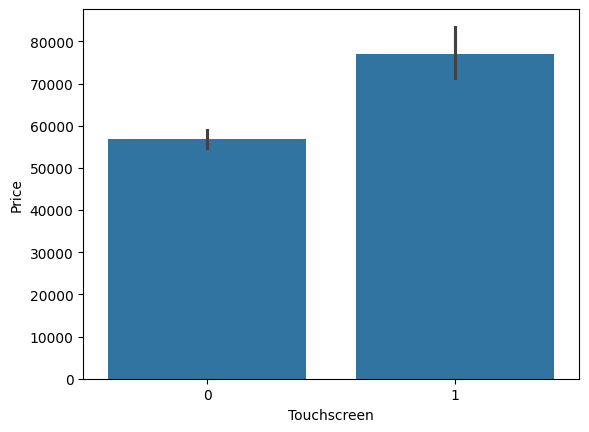

In [14]:
sns.barplot(x=df['Touchscreen'],y=df['Price'],estimator ='mean' )

In [15]:
df['ips']  = df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

In [16]:
df['y_resolution'] = df['ScreenResolution'].str.split('x').apply(lambda x : x[-1])

In [17]:
df['x_resolution'] = df['ScreenResolution'].str.split('x').apply(lambda x : x[0])

In [18]:
df['x_resolution'] = df['x_resolution'].str.split(' ').apply(lambda x : x[-1])

In [19]:
df.head(1)

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,y_resolution,x_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,1600,2560


In [20]:
df['x_resolution'] = df['x_resolution'].astype('int32')
df['y_resolution'] = df['y_resolution'].astype('int32')

In [21]:
df.head(1)

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,y_resolution,x_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,1600,2560


In [22]:
df.corr(numeric_only=True)['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210495
Price           1.000000
Touchscreen     0.191226
ips             0.252208
y_resolution    0.552809
x_resolution    0.556529
Name: Price, dtype: float64

In [23]:
df[['y_resolution', 'x_resolution','Inches']]

,y_resolution,x_resolution,Inches
0,1600,2560,13.3
1,900,1440,13.3
2,1080,1920,15.6
3,1800,2880,15.4
4,1600,2560,13.3
...,...,...,...
1298,1080,1920,14.0
1299,1800,3200,13.3
1300,768,1366,14.0
1301,768,1366,15.6


In [24]:
import numpy as np

In [25]:
df['ppi'] = np.sqrt(df['x_resolution']**2 + df['y_resolution']**2) / df['Inches']

In [26]:
df.head()

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,y_resolution,x_resolution,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,1600,2560,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.339844,47895.5232,0,0,900,1440,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.860352,30636.0000,0,0,1080,1920,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.830078,135195.3360,0,1,1800,2880,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.370117,96095.8080,0,1,1600,2560,226.983005


In [27]:
df.corr(numeric_only=True)['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210495
Price           1.000000
Touchscreen     0.191226
ips             0.252208
y_resolution    0.552809
x_resolution    0.556529
ppi             0.473487
Name: Price, dtype: float64

In [28]:
df.head(1)

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,y_resolution,x_resolution,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,1600,2560,226.983005


In [29]:
df.drop(columns=['x_resolution','y_resolution','Inches'],inplace=True)

In [30]:
# a = df['Cpu'].str.split(' ').apply(lambda x :x[0:3])
# a.apply(lambda x : )

In [31]:
df['cpu name'] = df['Cpu'].apply(lambda x : ' '.join(x.split()[0:3]))

In [32]:
df


c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,cpu name
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.339844,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.860352,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.830078,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.370117,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.799805,33992.6400,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.299805,79866.7200,1,1,276.053530,Intel Core i7
1300,Lenovo,Notebook,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.500000,12201.1200,0,0,111.935204,Intel Celeron Dual
1301,HP,Notebook,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.189453,40705.9200,0,0,100.454670,Intel Core i7


In [33]:
def processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i9' or text == 'Intel Core i5':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else :
            return 'AMD Processor'
        
        
    

In [34]:
df['cpu_brand'] = df['cpu name'].apply(processor)

In [35]:
df.head(1)

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,cpu name,cpu_brand
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5


In [36]:
df.drop(columns=['Cpu','cpu name'],inplace=True)

In [37]:
df.head()

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,cpu_brand
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.339844,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.860352,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.830078,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.370117,96095.8080,0,1,226.983005,Intel Core i5


In [38]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
64GB SSD                       

In [39]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Convert to string BEFORE checking for substrings
df["second"] = df["second"].fillna("0").astype(str)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\muham\AppData\Local\Temp\ipykernel_7456\1334725798.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)


In [40]:
df.head()

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.339844,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.860352,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.830078,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.370117,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [41]:
df.drop(columns=['Memory'],inplace=True)

In [42]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210495
Price            1.000000
Touchscreen      0.191226
ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [43]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [44]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x : x.split(' ')[0])

In [45]:
df

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,1440x900,8,Intel HD Graphics 6000,macOS,1.339844,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.860352,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.830078,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.370117,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,4,Intel HD Graphics 520,Windows 10,1.799805,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,Intel HD Graphics 520,Windows 10,1.299805,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,1366x768,2,Intel HD Graphics,Windows 10,1.500000,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,Notebook,1366x768,6,AMD Radeon R5 M330,Windows 10,2.189453,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD


In [46]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

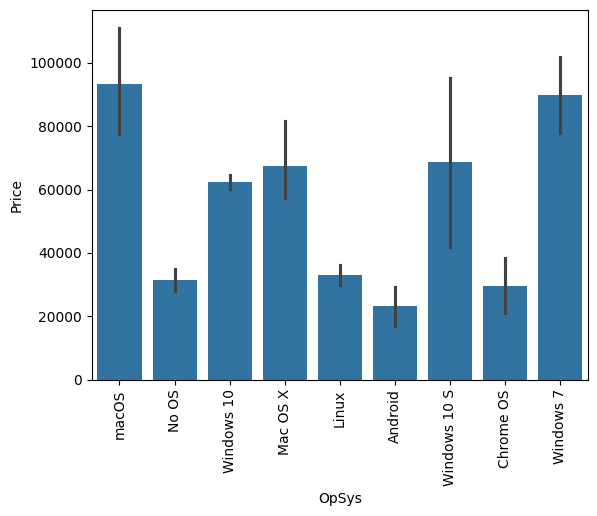

In [47]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')

In [48]:
def OS(inp):
    if inp == 'Windows 10' or inp == 'Windows 10 S' or inp == 'Windows 7':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Other/No OS/Linux'

In [49]:
 df['OS'] = df['OpSys'].apply(OS)

In [50]:
df

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,cpu_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,1440x900,8,Intel HD Graphics 6000,macOS,1.339844,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.860352,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.830078,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.370117,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,4,Intel HD Graphics 520,Windows 10,1.799805,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,Intel HD Graphics 520,Windows 10,1.299805,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,1366x768,2,Intel HD Graphics,Windows 10,1.500000,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,1366x768,6,AMD Radeon R5 M330,Windows 10,2.189453,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [51]:
df.drop(columns='OpSys',inplace=True)

([0, 1, 2],
 [Text(0, 0, 'Mac'), Text(1, 0, 'Other/No OS/Linux'), Text(2, 0, 'Windows')])

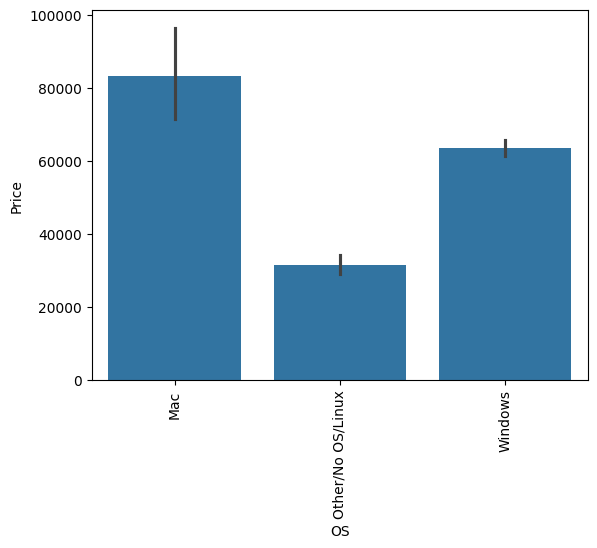

In [52]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')

<Axes: >

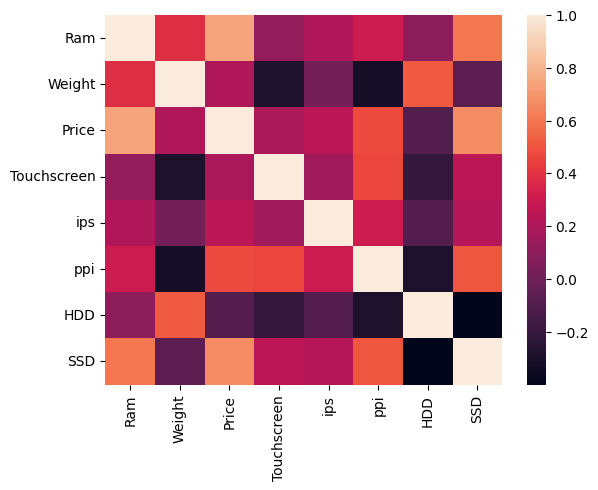

In [53]:
sns.heatmap(df.corr(numeric_only=True))

C:\Users\muham\AppData\Local\Temp\ipykernel_7456\77005867.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']),kde=True)


<Axes: xlabel='Price', ylabel='Density'>

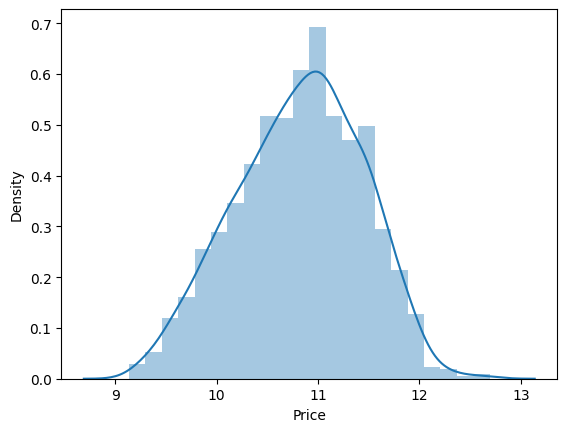

In [54]:
sns.distplot(np.log(df['Price']),kde=True)

In [55]:
df.drop(columns=['ScreenResolution','Gpu'],inplace=True)

In [56]:
df.head()

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,Ram,Weight,Price,Touchscreen,ips,ppi,cpu_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,8,1.370117,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.339844,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.860352,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.830078,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.370117,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [57]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [58]:
x.shape

(1303, 12)

In [59]:
import  sklearn
from sklearn.model_selection import train_test_split


In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesClassifier
from xgboost import XGBRegressor

In [65]:
df.head(1)

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,Ram,Weight,Price,Touchscreen,ips,ppi,cpu_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,8,1.370117,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


In [ ]:
step_1 = ColumnTransformer(transformers=[
    ('col_tr', OneHotEncoder(sparse_output=True,drop='first'),['Company','TypeName','cpu_brand','Gpu_brand','OS']),
],remainder='passthrough'
    
)


In [71]:
step_2 = LinearRegression()

In [77]:
pipeline = Pipeline(steps=[
    ('step_1',step_1),
    ('step_2',step_2)
])

In [78]:
pipeline.fit(x_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('step_1', ...), ('step_2', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('col_tr', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sp

In [79]:
y_pred = pipeline.predict(x_test)

In [80]:
from sklearn.metrics import r2_score


In [81]:
print(r2_score(y_test,y_pred))

0.819709924493091


RIDGE REGRESSION

In [ ]:
step_1 = ColumnTransformer(transformers=[
    ('col_tr', OneHotEncoder(sparse_output=True,drop='first'),['Company','TypeName','cpu_brand','Gpu_brand','OS']),
],remainder='passthrough'
    
)

In [82]:
from sklearn.linear_model import Ridge

In [ ]:
step_2 =Ridge(alpha=1.0)